In [1]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    plot_confusion_matrix, 
    plot_roc_curve,
    ConfusionMatrixDisplay, 
    RocCurveDisplay
)
from tqdm.auto import tqdm

import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
len(df)

50000

In [5]:
X = df.review
y = df.sentiment.replace({'positive': 1, 'negative': 0})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [7]:
tfidf = TfidfVectorizer(
    strip_accents=None,
    lowercase=False,
    preprocessor=None,
    use_idf=True,
    norm='l2',
    smooth_idf=True,
    min_df=0.0,
    max_df=1.0,
    stop_words='english'
)


In [8]:
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [9]:
def train_eval_model(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  fig, axes = plt.subplots(nrows=2, figsize=(20, 20))
  plot_confusion_matrix(model, X_test, y_test, ax=axes[0])
  plot_roc_curve(model, X_test, y_test, ax=axes[1])
  return axes

# Modele ML

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a0ad3c350>,
      dtype=object)

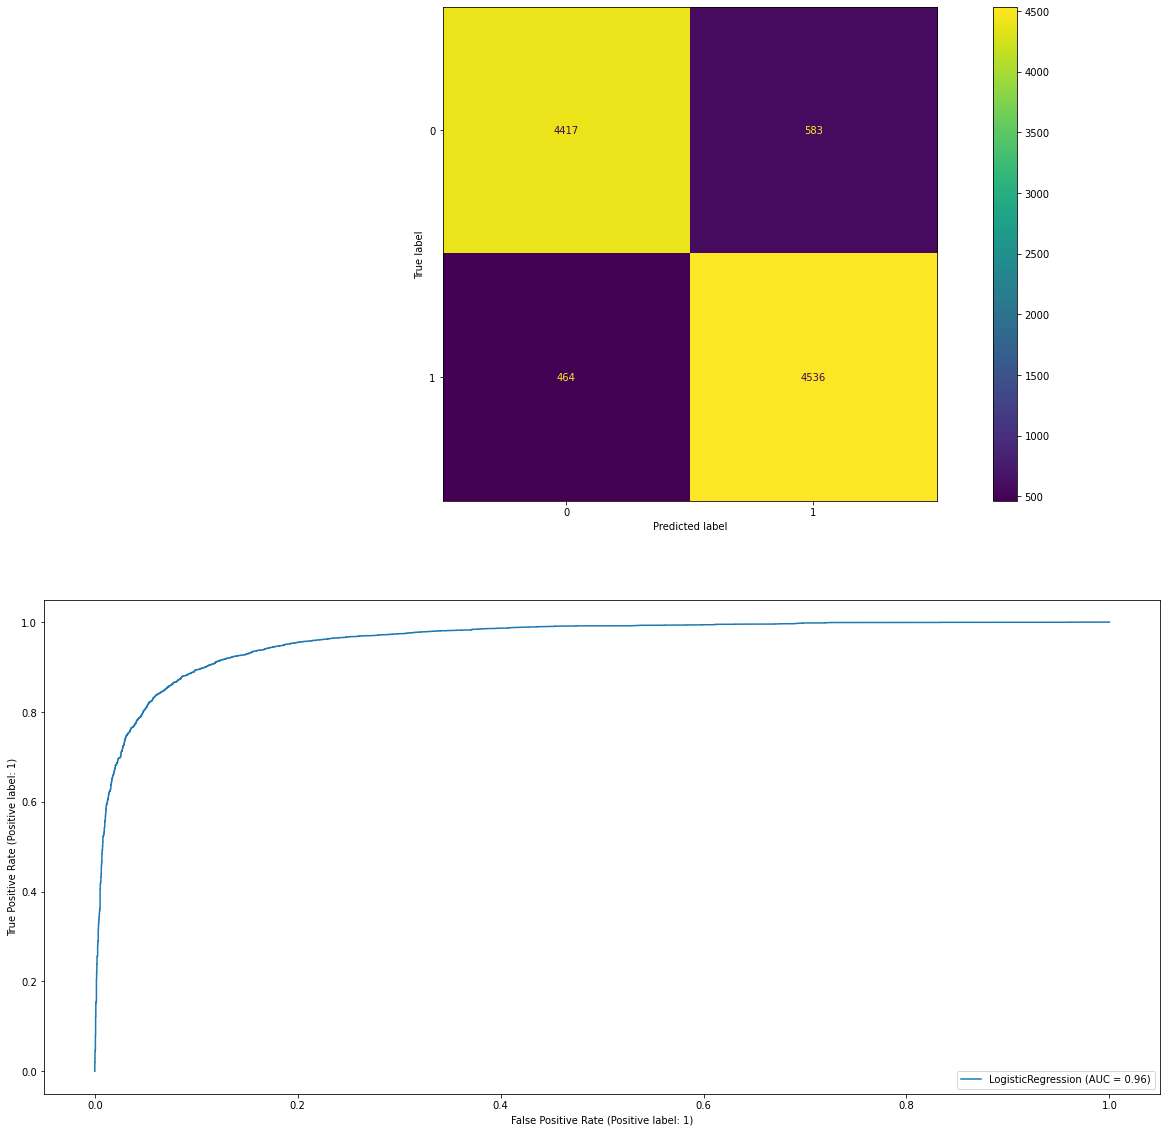

In [10]:
model = LogisticRegression()
train_eval_model(model)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      5000
           1       0.88      0.91      0.90      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a0a9006d0>,
      dtype=object)

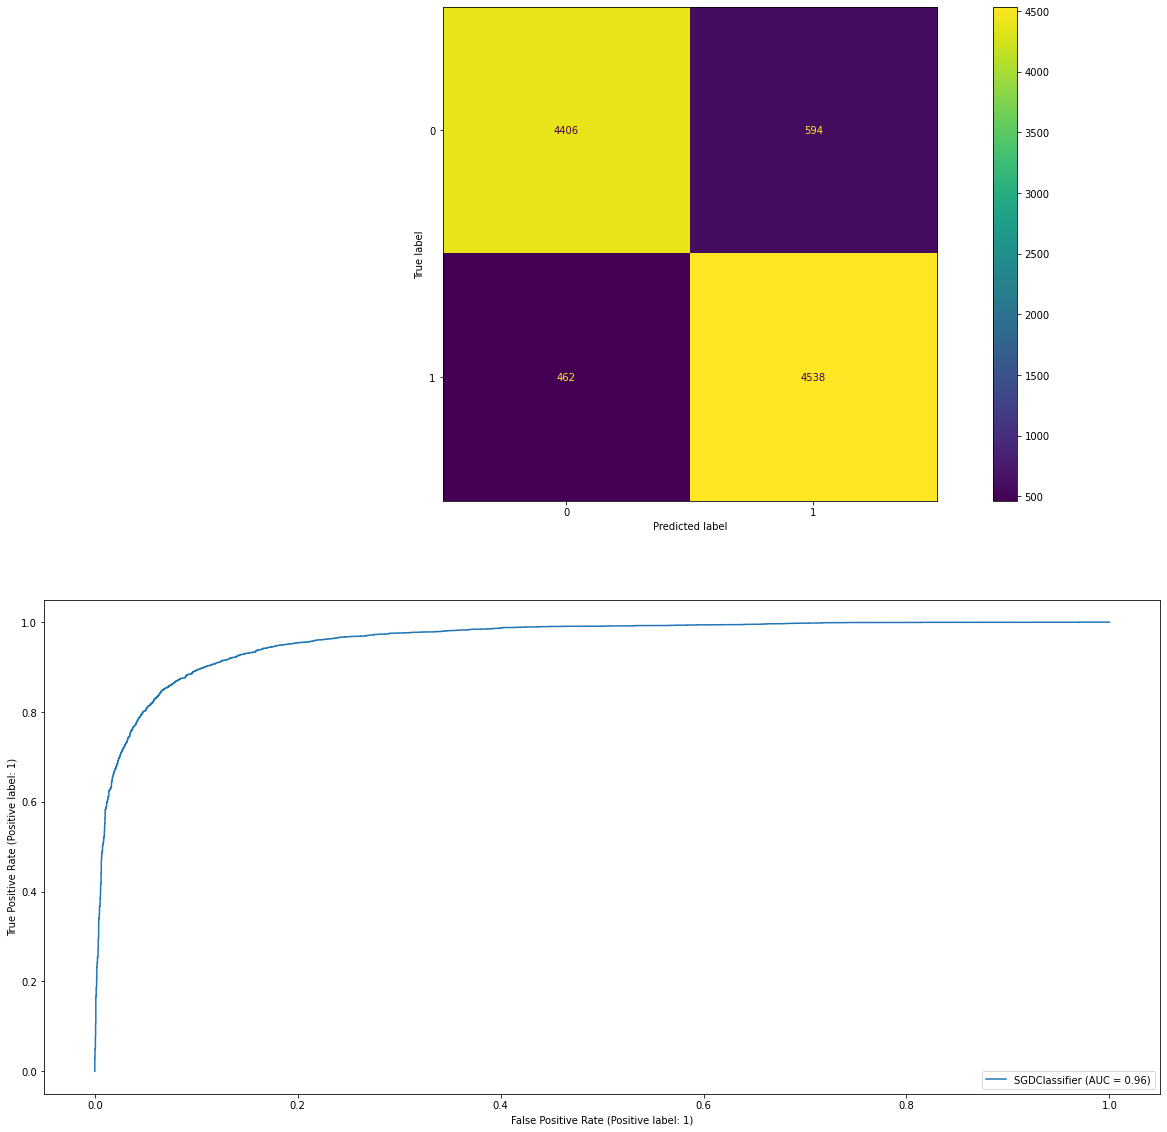

In [11]:
model = SGDClassifier(
    early_stopping=True
)
train_eval_model(model)

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      5000
           1       0.78      0.86      0.82      5000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a0abe7890>,
      dtype=object)

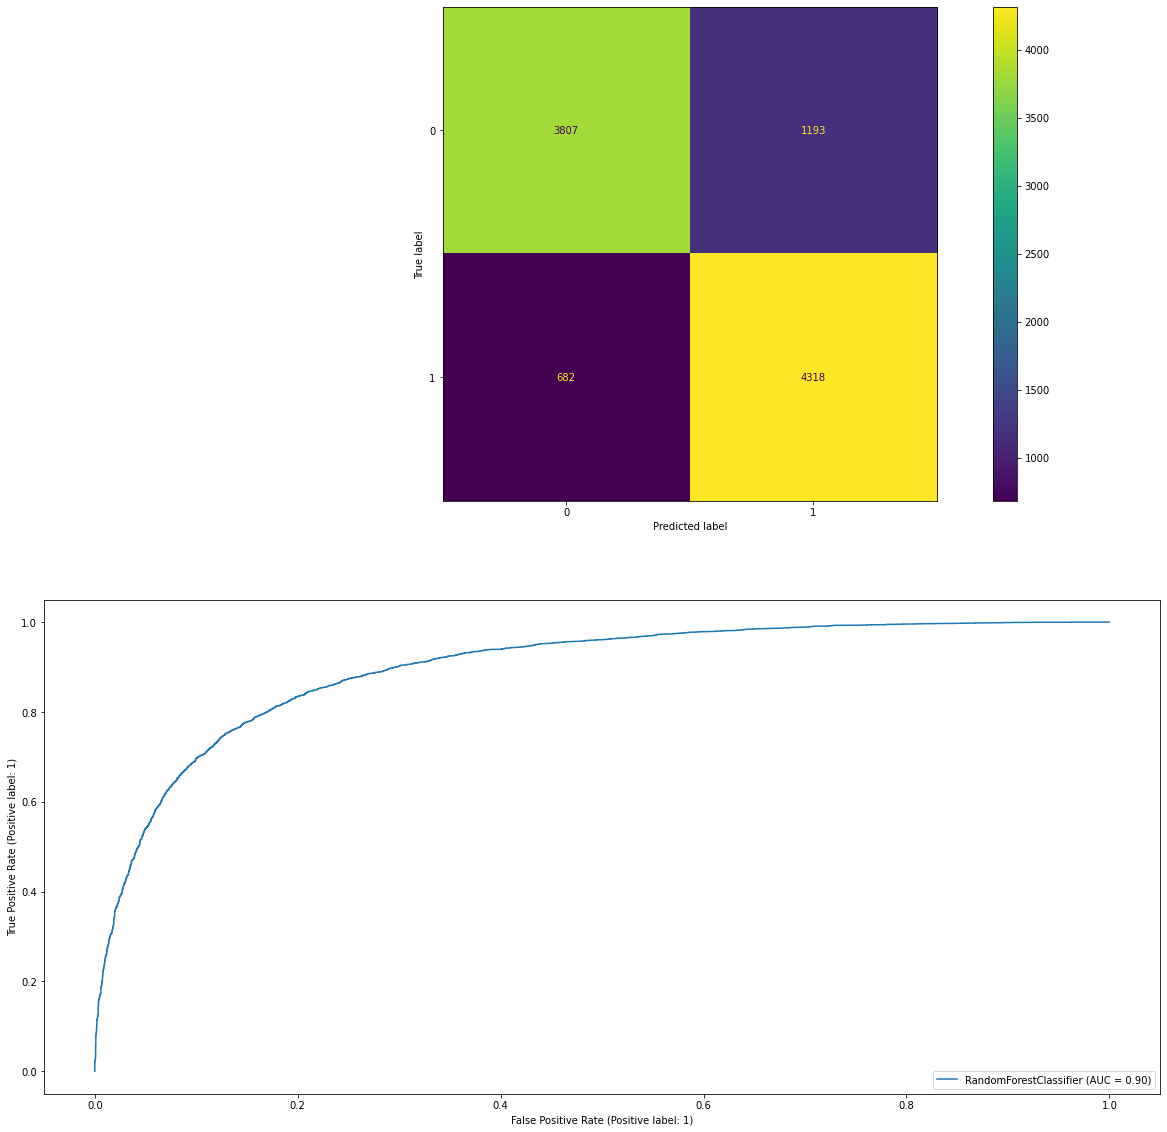

In [12]:
model = RandomForestClassifier(
    n_estimators=250,
    max_depth=3
)
train_eval_model(model)

# Sieć neuronowa

In [13]:
import torch
import torchtext
from torch import nn

In [14]:
max_len = 256
min_freq = 5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [15]:
tokenizer = torchtext.data.utils.get_tokenizer('basic_english')

In [16]:
def tokenize(sample):
  return tokenizer(sample)[:max_len]

In [17]:
X_tokenized = X.map(tokenize).values
X_train, X_test, y_train, y_test = train_test_split(X_tokenized, y, test_size=0.2, stratify=y)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)

In [18]:
special_tokens = ['<unk>', '<pad>']
vocab = torchtext.vocab.build_vocab_from_iterator(X_train,
                                                  min_freq=min_freq,
                                                  specials=special_tokens)

In [19]:
unk_index = vocab['<unk>']
pad_index = vocab['<pad>']
vocab.set_default_index(unk_index)

In [20]:
def tokens_to_ids(sample):
  ids = [vocab[token] for token in sample]
  ids += [pad_index] * (max_len - len(ids))
  return ids

In [21]:
X_train = np.stack(pd.Series(X_train).map(tokens_to_ids).values)
X_validation = np.stack(pd.Series(X_validation).map(tokens_to_ids).values)
X_test = np.stack(pd.Series(X_test).map(tokens_to_ids).values)

In [22]:
X_train.shape

(36000, 256)

In [23]:
X_validation.shape

(4000, 256)

In [24]:
X_test.shape

(10000, 256)

In [25]:
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout_rate, 
                 pad_index):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_index)
        self.convs = nn.ModuleList([nn.Conv1d(embedding_dim, 
                                              n_filters, 
                                              filter_size) 
                                    for filter_size in filter_sizes])
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, ids):
        # ids = [batch size, seq len]
        embedded = self.dropout(self.embedding(ids))
        # embedded = [batch size, seq len, embedding dim]
        embedded = embedded.permute(0,2,1)
        # embedded = [batch size, embedding dim, seq len]
        conved = [torch.relu(conv(embedded)) for conv in self.convs]
        # conved_n = [batch size, n filters, seq len - filter_sizes[n] + 1]
        pooled = [conv.max(dim=-1).values for conv in conved]
        # pooled_n = [batch size, n filters]
        cat = self.dropout(torch.cat(pooled, dim=-1))
        # cat = [batch size, n filters * len(filter_sizes)]
        prediction = self.fc(cat)
        # prediction = [batch size, output dim]
        return prediction

In [26]:
def get_accuracy(y_hat, label):
    batch_size, _ = y_hat.shape
    y_hat[y_hat > 0.5] = 1
    y_hat[y_hat <= 0.5] = 0
    correct_predictions = y_hat.eq(label).sum()
    accuracy = correct_predictions / batch_size
    return accuracy

In [27]:
def train(model, criterion, optimizer, data):
  epoch_loss_train = []
  epoch_acc_train = []

  model.train()

  for batch_x, batch_y in tqdm(data, desc='Train'):
    optimizer.zero_grad()

    ids = batch_x.to(device)
    labels = batch_y.to(device).reshape(-1, 1).float()

    prediction = model(ids)
    loss = criterion(prediction, labels)
    prediction = torch.sigmoid(prediction)
    accuracy = get_accuracy(prediction, labels)
    loss.backward()
    optimizer.step()
    epoch_loss_train.append(loss.item())
    epoch_acc_train.append(accuracy.item())
  return epoch_loss_train, epoch_acc_train


def evaluate(model, criterion, optimizer, data):
  epoch_loss_validation = []
  epoch_acc_validation = []

  model.eval()
  with torch.no_grad():

    for batch_x, batch_y in tqdm(data, desc='Validation'):
      ids = batch_x.to(device)
      labels = batch_y.to(device).reshape(-1, 1).float()

      prediction = model(ids)
      loss = criterion(prediction, labels)
      prediction = torch.sigmoid(prediction)
      accuracy = get_accuracy(prediction, labels)

      epoch_loss_validation.append(loss.item())
      epoch_acc_validation.append(accuracy.item())
  return epoch_loss_validation, epoch_acc_validation


In [28]:
def train_eval_nn_model(model, criterion, optimizer, train_dataloader, valid_dataloader):
  loss_train = []
  acc_train = []
  loss_valid = []
  acc_valid = []
  best_valid_loss = float('inf')
  early_stopping_counter = 0
  early_stopping_limit = 3

  for epoch in tqdm(range(n_epochs), desc='Epochs'):
    epoch_loss_train, epoch_acc_train = train(model, criterion, optimizer, train_dataloader)
    epoch_loss_valid, epoch_acc_valid = evaluate(model, criterion, optimizer, valid_dataloader)

    loss_train.extend(epoch_loss_train)
    acc_train.extend(epoch_acc_train)
    loss_valid.extend(epoch_loss_valid)
    acc_valid.extend(epoch_acc_valid)

    val_loss = np.mean(epoch_loss_valid)
    if val_loss < best_valid_loss:
      print(f'Saving model with loss: {val_loss}')
      best_valid_loss = val_loss
      early_stopping_counter = 0
      torch.save(model, 'sentiment.torch')
    else:
      early_stopping_counter += 1
    
    if early_stopping_counter >= early_stopping_limit:
      print(f'Early stopping because of {early_stopping_limit} epochs without improvement')
      break

  return best_valid_loss, plot_model_stats(loss_train, loss_valid, acc_train, acc_valid)

                      

In [29]:
def plot_model_stats(loss_train, loss_valid, acc_train, acc_valid):
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))
  axes[0][0].plot(loss_train)
  axes[0][0].set_title('Training loss')

  axes[1][0].plot(loss_valid)
  axes[1][0].set_title('Validation loss')

  axes[0][1].plot(acc_train)
  axes[0][1].set_title('Accuracy training')

  axes[1][1].plot(acc_valid)
  axes[1][1].set_title('Accuracy validation')
  plt.show()
  return axes

In [30]:
def process_sentence(sentence, model):
  tokens = tokenize(sentence)
  ids = tokens_to_ids(tokens)
  pred = torch.sigmoid(model(torch.tensor(ids).to(device).reshape(1, -1))).item()
  return pred


In [31]:
def train_and_check_model(embedding_dim=300, n_filters=100, filter_sizes=[3,5,7], dropout_rate=0.25, batch_size=1024):
  vocab_size = len(vocab)
  output_dim = 1

  model = CNN(vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout_rate, pad_index)
  optimizer = torch.optim.Adam(model.parameters())
  criterion = nn.BCEWithLogitsLoss()
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  model = model.to(device)
  criterion = criterion.to(device)

  train_dataloader = torch.utils.data.DataLoader(
      list(zip(X_train, y_train)),
      batch_size=batch_size
  )
  valid_dataloader = torch.utils.data.DataLoader(
      list(zip(X_validation, y_validation)),
      batch_size=batch_size
  )
  test_dataloader = torch.utils.data.DataLoader(
      list(zip(X_test, y_test)),
      batch_size=batch_size
  )
  return model, train_eval_nn_model(model, criterion, optimizer, train_dataloader, valid_dataloader)


## Wybranie hiperparametrów

In [32]:
params = [
  # baseline
  dict(
    embedding_dim = 300,
    n_filters = 100,
    filter_sizes = [3,5,7],
    dropout_rate = 0.25,
    batch_size = 1024
  ),
  # more filters
  dict(
    embedding_dim = 300,
    n_filters = 200,
    filter_sizes = [3,5,7],
    dropout_rate = 0.25,
    batch_size = 1024
  ),
  # higher embedding dim
  dict(
    embedding_dim = 1000,
    n_filters = 100,
    filter_sizes = [3,5,7],
    dropout_rate = 0.25,
    batch_size = 1024
  )
]

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.4833331033587456


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.4201026037335396


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.37869322299957275


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.352141335606575


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.3351452350616455


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.3222637474536896


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.3184782862663269


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.3065476566553116


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.3048425763845444


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.2925770878791809


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.2901321277022362


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.29002250730991364


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Early stopping because of 3 epochs without improvement


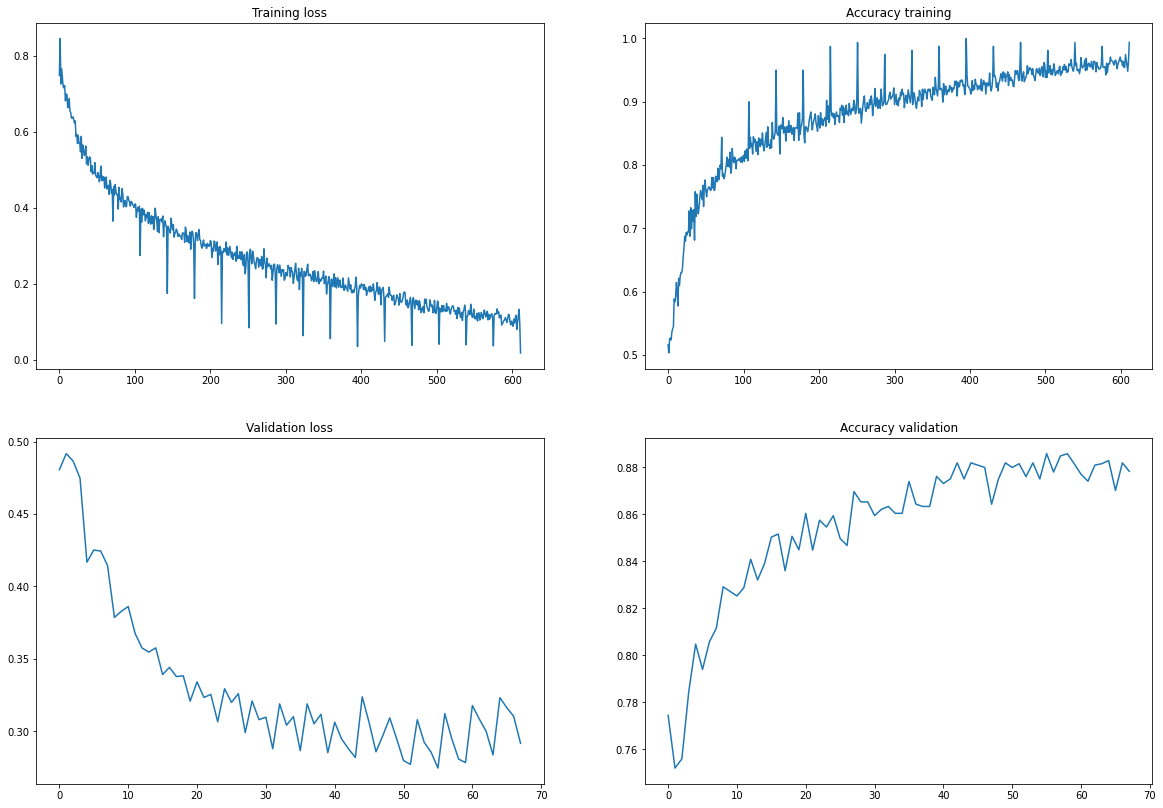

params {'embedding_dim': 300, 'n_filters': 100, 'filter_sizes': [3, 5, 7], 'dropout_rate': 0.25, 'batch_size': 1024}
valid loss = 0.29002250730991364


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.46679801493883133


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.4013632535934448


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.36317089200019836


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.34057340770959854


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.32453854382038116


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.31688372045755386


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.3064361810684204


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.29608527570962906


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Early stopping because of 3 epochs without improvement


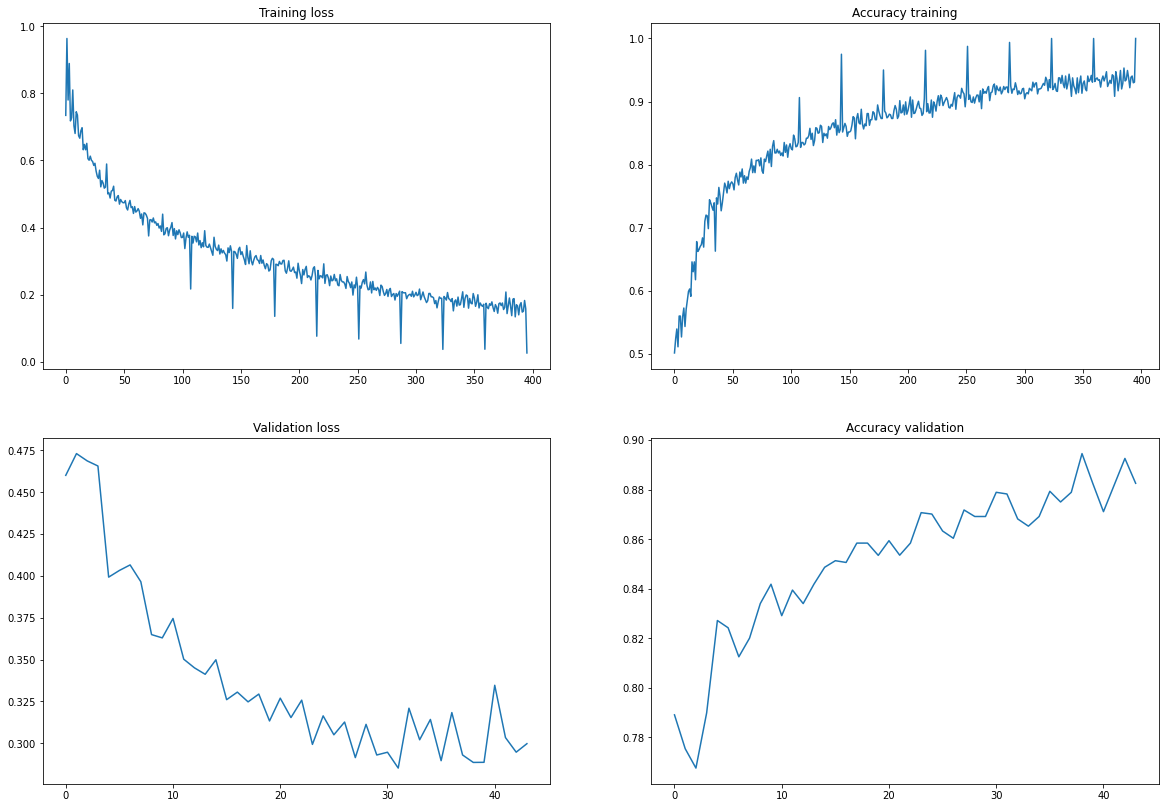

params {'embedding_dim': 300, 'n_filters': 200, 'filter_sizes': [3, 5, 7], 'dropout_rate': 0.25, 'batch_size': 1024}
valid loss = 0.29608527570962906


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.4479397237300873


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.39006931334733963


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.35439178347587585


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.32289983332157135


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.31474419683218


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.30309730023145676


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.3021185025572777


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.2921628877520561


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Early stopping because of 3 epochs without improvement


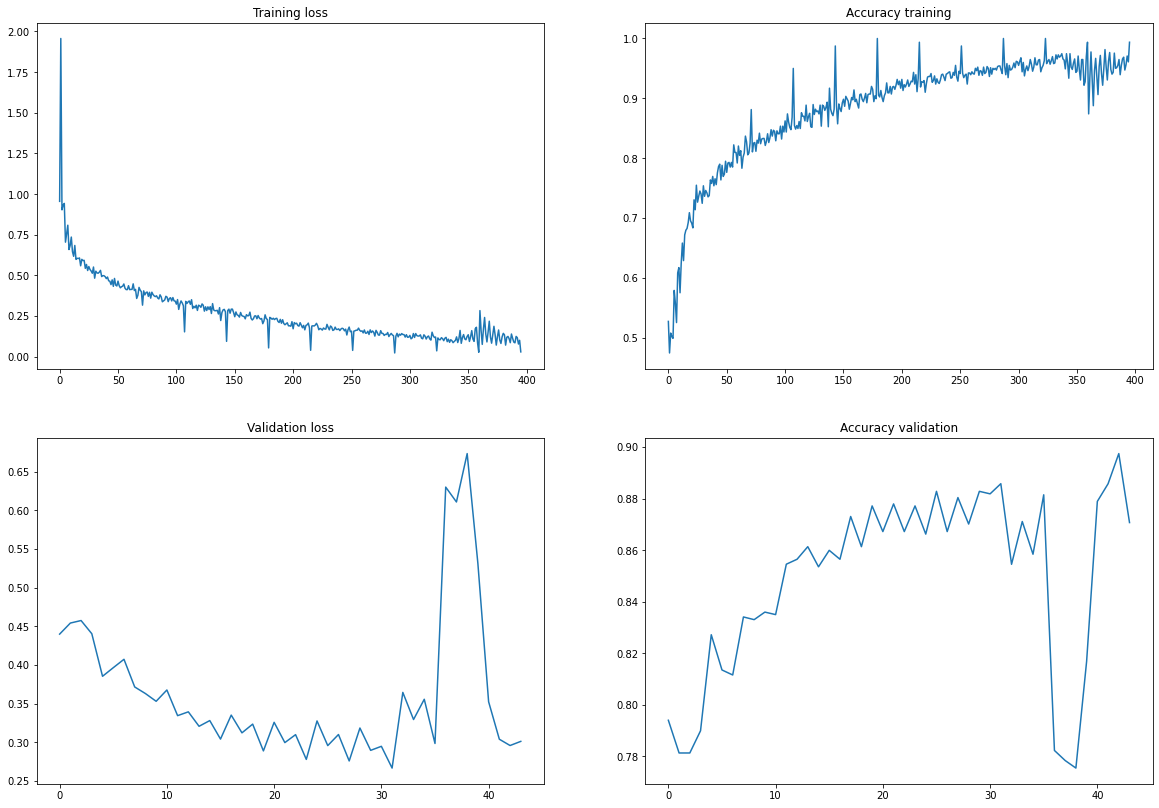

params {'embedding_dim': 1000, 'n_filters': 100, 'filter_sizes': [3, 5, 7], 'dropout_rate': 0.25, 'batch_size': 1024}
valid loss = 0.2921628877520561


In [33]:
n_epochs = 20

for param in params:
  model, (valid_loss, plots) = train_and_check_model(**param)
  print(f'params {param}')
  print(f'valid loss = {valid_loss}')

Najlepszy loss na zbiorze walidacyjnym wyszedł przy pierwszym setcie parametrów. 

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.5041450262069702


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.4302831068634987


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.3858734592795372


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.3584401309490204


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.3382944315671921


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.32337645441293716


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.3111450895667076


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.30505743622779846


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.2934504896402359


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.29093389213085175


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.2854764610528946


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.28417032212018967


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.2822142690420151


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Saving model with loss: 0.2806415483355522


Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Train:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Early stopping because of 3 epochs without improvement


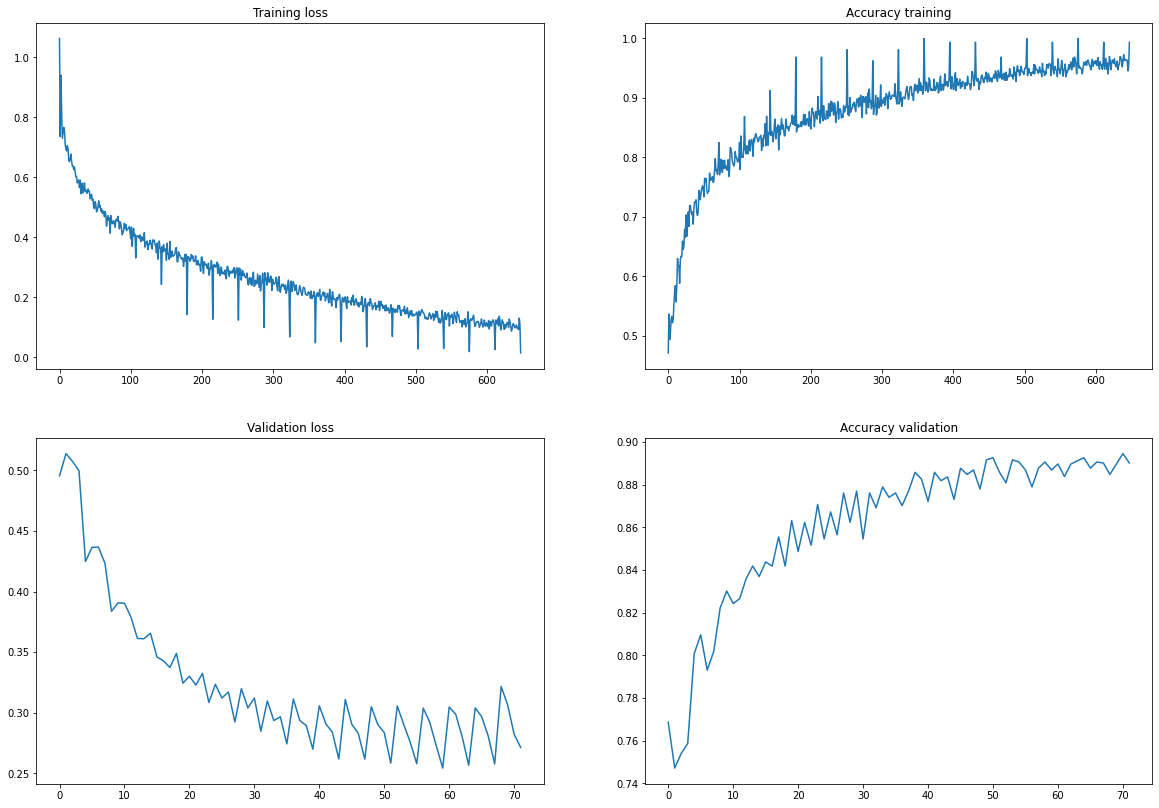

In [34]:
model, (val_loss, plots) = train_and_check_model(**{'embedding_dim': 300, 'n_filters': 100, 'filter_sizes': [3, 5, 7], 'dropout_rate': 0.25, 'batch_size': 1024})

## Test i podsumowanie

In [35]:
test_dataloader = torch.utils.data.DataLoader(
    list(zip(X_test, y_test)),
    batch_size=1024
)

In [36]:
epoch_loss_validation = []
epoch_acc_validation = []
predictions = []
predictions_binary = []
y_true = []

model.eval()
with torch.no_grad():
  for batch_x, batch_y in tqdm(test_dataloader, desc='Test'):
    ids = batch_x.to(device)
    labels = batch_y.to(device).reshape(-1, 1).float()

    prediction = model(ids)
    prediction = torch.sigmoid(prediction).cpu().detach().numpy()[:, 0]
    prediction_binary = prediction.copy()
    prediction_binary[prediction < 0.5] = 0
    prediction_binary[prediction >= 0.5] = 1
    predictions.extend(prediction)
    predictions_binary.extend(prediction_binary)
    y_true.extend(labels.cpu().detach().numpy()[:, 0])

Test:   0%|          | 0/10 [00:00<?, ?it/s]

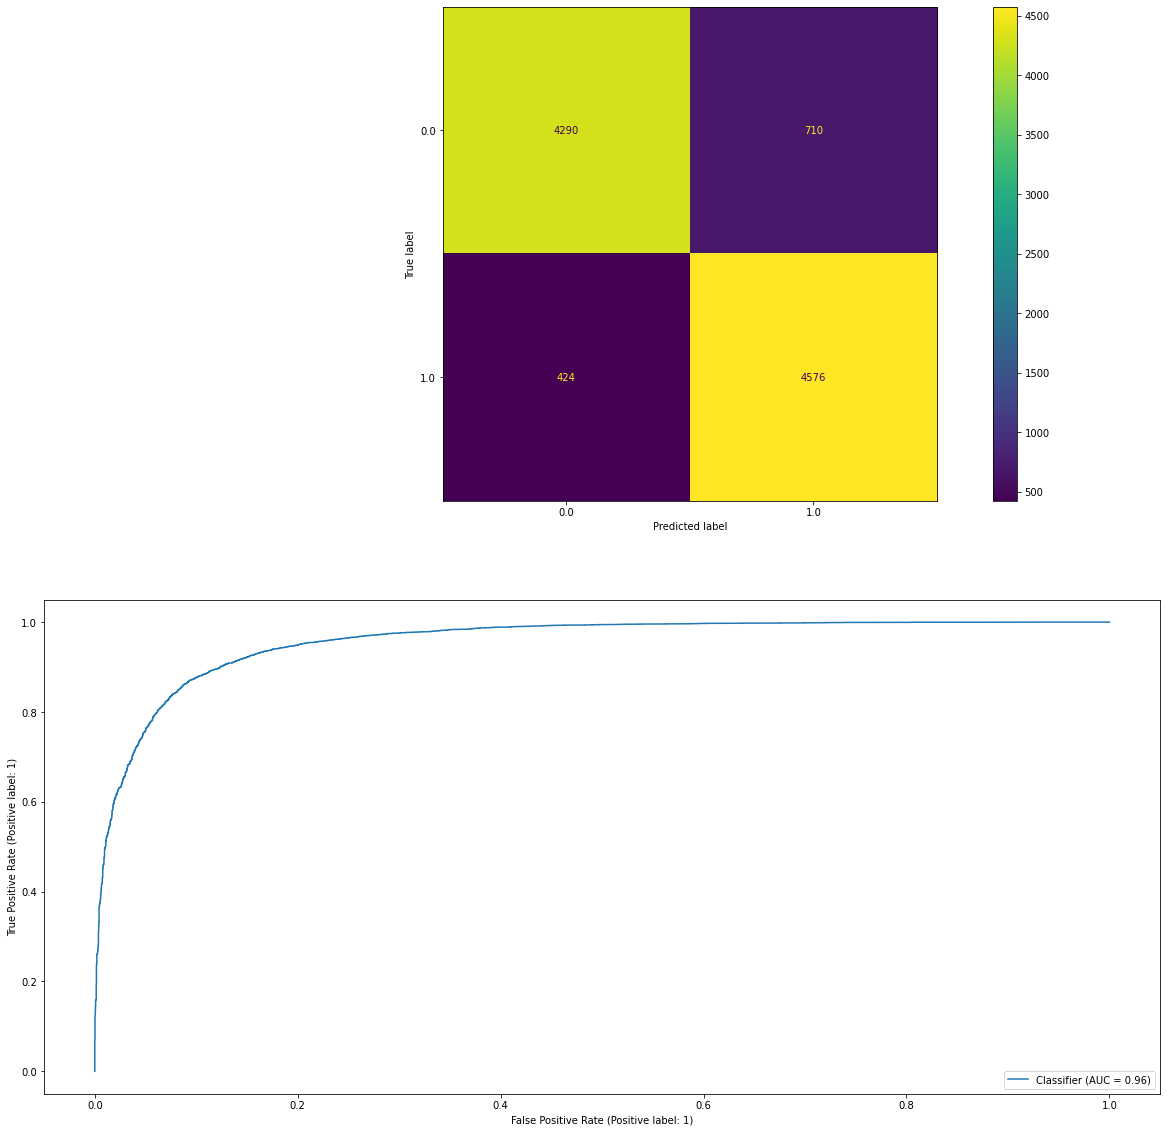

In [38]:
fig, axes = plt.subplots(nrows=2, figsize=(20, 20))
ConfusionMatrixDisplay.from_predictions(y_true, predictions_binary, ax=axes[0])
RocCurveDisplay.from_predictions(y_true, predictions, ax=axes[1])

In [40]:
sentence = 'This movie was so boring I slept well on it.'
process_sentence(sentence, model)

0.0013207431184127927